> From the PO.DAAC Cookbook, to access the GitHub version of the notebook, follow [this link](https://github.com/podaac/tutorials/blob/master/notebooks/meetings_workshops/arctic_2019.ipynb).

# Ocean Satellite and In-situ Comparison in the Cloud
### *Author: Celia Ou, PO.DAAC*

## Summary
Here, we compare salinity from the SMAP satellite and Saildrone in-situ measurements. Both datasets are located within the cloud.

#### **Follow along with the Data in Action story:**
By the end of this notebook, you will have recreated a similar plot to the one featured in this Data-in-Action story:  
https://podaac.jpl.nasa.gov/DataAction-2021-10-05-Monitoring-Changes-in-the-Arctic-Using-Saildrone-SMAP-Satellite-and-Ocean-Models-Data

#### **Shortnames of datasets used here:**  
SMAP_RSS_L3_SSS_SMI_8DAY-RUNNINGMEAN_V5: https://podaac.jpl.nasa.gov/dataset/SMAP_RSS_L3_SSS_SMI_8DAY-RUNNINGMEAN_V5  
SAILDRONE_ARCTIC: https://podaac.jpl.nasa.gov/dataset/SAILDRONE_ARCTIC 

## Requirements
### 1. Compute environment 

This tutorial can **only** be run in the following environments:
- **AWS instance running in us-west-2**: NASA Earthdata Cloud data in S3 can be directly accessed via temporary credentials; this access is limited to requests made within the US West (Oregon) (code: `us-west-2`) AWS region.

### 2. Earthdata Login

An Earthdata Login account is required to access data, as well as discover restricted data, from the NASA Earthdata system. Thus, to access NASA data, you need Earthdata Login. Please visit https://urs.earthdata.nasa.gov to register and manage your Earthdata Login account. This account is free to create and only takes a moment to set up.

### 3. netrc File

You will need a `.netrc` file containing your NASA Earthdata Login credentials in order to execute the notebooks. A `.netrc` file can be created manually within text editor and saved to your home directory. For additional information see: [Authentication for NASA Earthdata tutorial](https://nasa-openscapes.github.io/2021-Cloud-Workshop-AGU/tutorials/02_NASA_Earthdata_Authentication.html).

### Import Libraries

In [1]:
# To access dataset using Earthaccess
import earthaccess

# To access dataset without Earthaccess
import os
import s3fs
import requests
import glob

# To open dataset
import xarray as xr

# For plotting
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

## **SMAP dataset**
Search for and open this dataset as an example of using Earthaccess

In [2]:
auth = earthaccess.login(strategy="netrc")

You're now authenticated with NASA Earthdata Login
Using token with expiration date: 06/18/2023
Using .netrc file for EDL


In [3]:
short_name="SMAP_RSS_L3_SSS_SMI_8DAY-RUNNINGMEAN_V5"

results = earthaccess.search_data(
    short_name=short_name,
    cloud_hosted=True,
    temporal=("2019-05-01T00:00:00", "2019-10-01T00:00:00"),
    bounding_box=(-170,65,-160,71) # (west, south, east, north)
)

Granules found: 122


In [4]:
ds_sss = xr.open_mfdataset(earthaccess.open(results))

 Opening 122 granules, approx size: 0.0 GB


SUBMITTING | :   0%|          | 0/122 [00:00<?, ?it/s]

PROCESSING | :   0%|          | 0/122 [00:00<?, ?it/s]

COLLECTING | :   0%|          | 0/122 [00:00<?, ?it/s]

In [5]:
plot_west = -170
plot_east = -160
plot_south = 60
plot_north = 75

lat_bnds, lon_bnds = [plot_south, plot_north], [plot_west+360, plot_east+360] # Turn the longitudes in (-180,0) to (0,360)
ds_sss_subset_0 = ds_sss.sel(lat=slice(*lat_bnds), lon=slice(*lon_bnds))
ds_sss_subset_0['latitude'] = ds_sss_subset_0.lat
ds_sss_subset_0['longitude'] = ds_sss_subset_0.lon-360
ds_sss_subset = ds_sss_subset_0.swap_dims({'lat':'latitude', 'lon':'longitude'})
ds_sss_subset

<xarray.Dataset>
Dimensions:                 (longitude: 40, latitude: 60, time: 122,
                             uncertainty_components: 9, iceflag_components: 3)
Coordinates:
    lon                     (longitude) float32 190.1 190.4 ... 199.6 199.9
    lat                     (latitude) float32 60.12 60.38 60.62 ... 74.62 74.88
  * time                    (time) datetime64[ns] 2019-04-27T12:00:00 ... 201...
  * latitude                (latitude) float32 60.12 60.38 60.62 ... 74.62 74.88
  * longitude               (longitude) float32 -169.9 -169.6 ... -160.4 -160.1
Dimensions without coordinates: uncertainty_components, iceflag_components
Data variables: (12/19)
    nobs                    (time, latitude, longitude) float64 dask.array<chunksize=(1, 60, 40), meta=np.ndarray>
    nobs_RF                 (time, latitude, longitude) float64 dask.array<chunksize=(1, 60, 40), meta=np.ndarray>
    nobs_40km               (time, latitude, longitude) float64 dask.array<chunksize=(1, 60, 40), meta=np.ndarray>
    sss_smap                (time, latitude, longitude) float32 dask.array<chunksize=(1, 60, 40), meta=np.ndarray>
    sss_smap_RF             (time, latitude, longitude) float32 dask.array<chunksize=(1, 60, 40), meta=np.ndarray>
    sss_smap_unc            (time, latitude, longitude) float32 dask.array<chunksize=(1, 60, 40), meta=np.ndarray>
    ...                      ...
    fland                   (time, latitude, longitude) float32 dask.array<chunksize=(1, 60, 40), meta=np.ndarray>
    gice_est                (time, latitude, longitude) float32 dask.array<chunksize=(1, 60, 40), meta=np.ndarray>
    surtep                  (time, latitude, longitude) float32 dask.array<chunksize=(1, 60, 40), meta=np.ndarray>
    winspd                  (time, latitude, longitude) float32 dask.array<chunksize=(1, 60, 40), meta=np.ndarray>
    sea_ice_zones           (time, latitude, longitude) int8 dask.array<chunksize=(1, 60, 40), meta=np.ndarray>
    anc_sea_ice_flag        (time, latitude, longitude, iceflag_components) int8 dask.array<chunksize=(1, 60, 40, 3), meta=np.ndarray>
Attributes: (12/65)
    Conventions:                                            CF-1.7, ACDD-1.3
    title:                                                  SMAP ocean surfac...
    version:                                                V5.0 Validated Re...
    summary:                                                The dataset conta...
    acknowledgement:                                        Funded under Subc...
    processing_level:                                       L3
    ...                                                     ...
    Source_of_SMAP_SSS_retrievals:                          T. Meissner, F. W...
    Source_of_ancillary_SST:                                Canada Meteorolog...
    Source_of_ancillary_CCMP_wind_speed:                    Mears, C. et al.,...
    Source_of_ancillary_AMSR2_sea_ice_flag_and_correction:  Meissner, T. and ...
    Source_of_ancillary_land_mask:                          1 km land/water m...
    Source_of_ancillary_reference_SSS_from_HYCOM:           Hybrid Coordinate...

In [6]:
subset_mean_values = ds_sss_subset.sss_smap.mean(dim = 'time', skipna = True)
subset_mean_values

<xarray.DataArray 'sss_smap' (latitude: 60, longitude: 40)>
dask.array<mean_agg-aggregate, shape=(60, 40), dtype=float32, chunksize=(60, 40), chunktype=numpy.ndarray>
Coordinates:
    lon        (longitude) float32 190.1 190.4 190.6 190.9 ... 199.4 199.6 199.9
    lat        (latitude) float32 60.12 60.38 60.62 60.88 ... 74.38 74.62 74.88
  * latitude   (latitude) float32 60.12 60.38 60.62 60.88 ... 74.38 74.62 74.88
  * longitude  (longitude) float32 -169.9 -169.6 -169.4 ... -160.6 -160.4 -160.1

## **Saildrone dataset**
Accessing this dataset as an example of using s3fs

In [7]:
s3_cred_endpoint = 'https://archive.podaac.earthdata.nasa.gov/s3credentials'

In [8]:
def get_temp_creds():
    temp_creds_url = s3_cred_endpoint
    return requests.get(temp_creds_url).json()

In [9]:
temp_creds_req = get_temp_creds()
#temp_creds_req                      # !!! BEWARE, removing the # on this line will print your temporary S3 credentials.

In [10]:
fs_s3 = s3fs.S3FileSystem(anon=False, 
                          key=temp_creds_req['accessKeyId'], 
                          secret=temp_creds_req['secretAccessKey'], 
                          token=temp_creds_req['sessionToken'],
                          client_kwargs={'region_name':'us-west-2'})

In [11]:
bucket = os.path.join('podaac-ops-cumulus-protected/','SAILDRONE_ARCTIC','saildrone-*-1_minutes-*.nc')
sd_files = fs_s3.glob(bucket)
saildrone_files= [fs_s3.open(file) for file in sorted(sd_files)]
len(saildrone_files)

2

In [12]:
sd6 = xr.open_dataset(saildrone_files[0])
sd7 = xr.open_dataset(saildrone_files[1])
sd7

<xarray.Dataset>
Dimensions:                         (trajectory: 1, obs: 215731)
Coordinates:
    latitude                        (trajectory, obs) float64 ...
    longitude                       (trajectory, obs) float64 ...
    time                            (trajectory, obs) datetime64[ns] ...
  * trajectory                      (trajectory) float32 1.037e+03
Dimensions without coordinates: obs
Data variables: (12/79)
    SOG                             (trajectory, obs) float64 ...
    SOG_FILTERED_MEAN               (trajectory, obs) float64 ...
    SOG_FILTERED_STDDEV             (trajectory, obs) float64 ...
    SOG_FILTERED_MAX                (trajectory, obs) float64 ...
    SOG_FILTERED_MIN                (trajectory, obs) float64 ...
    COG                             (trajectory, obs) float64 ...
    ...                              ...
    TEMP_O2_RBR_MEAN                (trajectory, obs) float64 ...
    TEMP_O2_RBR_STDDEV              (trajectory, obs) float64 ...
    CHLOR_WETLABS_MEAN              (trajectory, obs) float64 ...
    CHLOR_WETLABS_STDDEV            (trajectory, obs) float64 ...
    CHLOR_RBR_MEAN                  (trajectory, obs) float64 ...
    CHLOR_RBR_STDDEV                (trajectory, obs) float64 ...
Attributes: (12/45)
    title:                     Arctic NASA MISST 2019 Mission
    summary:                   Saildrone surface observational data for the N...
    ncei_template_version:     NCEI_NetCDF_Trajectory_Template_v2.0
    Conventions:               CF-1.6, ACDD-1.3
    netcdf_version:            4.6.3
    featureType:               trajectory
    ...                        ...
    keywords_vocabulary:       NASA/GCMD
    publisher_name:            Saildrone
    publisher_url:             www.saildrone.com
    publisher_email:           support@saildrone.com
    acknowledgment:            Saildrone. 2019. Saildrone Arctic field campai...
    processing_level:          Level 2

## **Plot salinity side-by-side from SMAP and from Saildrone vehicle 1036** 

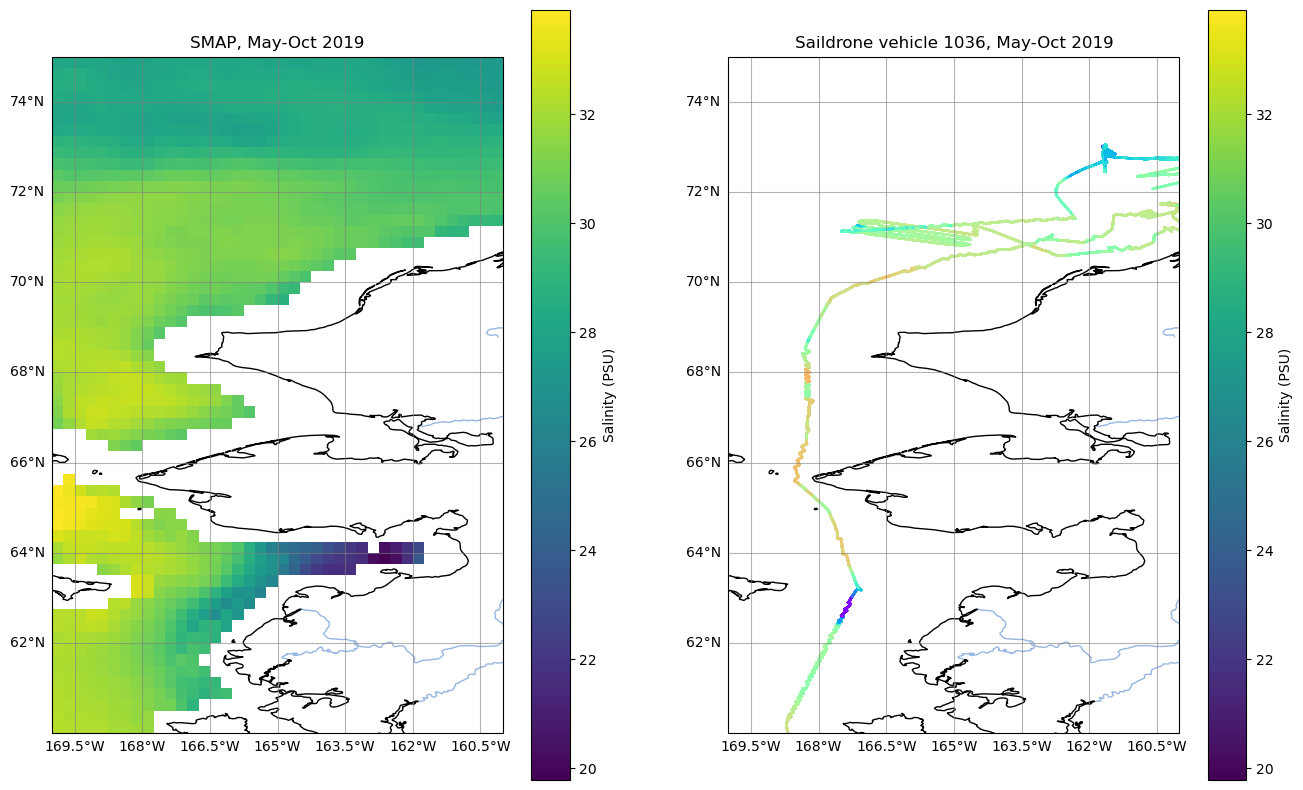

In [13]:
fig = plt.figure(figsize= (16,10))

rows = 1
columns = 2
ax = fig.add_subplot(rows, columns, 1, projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.RIVERS)
ax.coastlines()
ax.set_extent([plot_west, plot_east, plot_south, plot_north])
s = subset_mean_values.plot.pcolormesh(add_colorbar = False)
gl = ax.gridlines(color='gray',alpha=0.6,draw_labels=True) 
plt.title('SMAP, May-Oct 2019')
gl.top_labels = False
gl.left_labels = True
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
cb = plt.colorbar(s, ax = ax)
cb.set_label('Salinity (PSU)')

ax = fig.add_subplot(rows, columns, 2, projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.RIVERS)
ax.coastlines()
ax.set_extent([plot_west, plot_east, plot_south, plot_north])
s6 = plt.scatter(sd6.longitude, sd6.latitude, s = 0.5, c = sd6.SAL_SBE37_MEAN, vmin = 25, vmax = 35, cmap = 'rainbow', transform = ccrs.PlateCarree())
gl = ax.gridlines(color='gray',alpha=0.6,draw_labels=True)
plt.title('Saildrone vehicle 1036, May-Oct 2019')
gl.top_labels = False
gl.left_labels = True
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
cb = plt.colorbar(s, ax = ax)
cb.set_label('Salinity (PSU)')
plt.savefig('salinity_comparison_sd1036.png')

## **Plot salinity side-by-side from SMAP and from Saildrone vehicle 1037** 

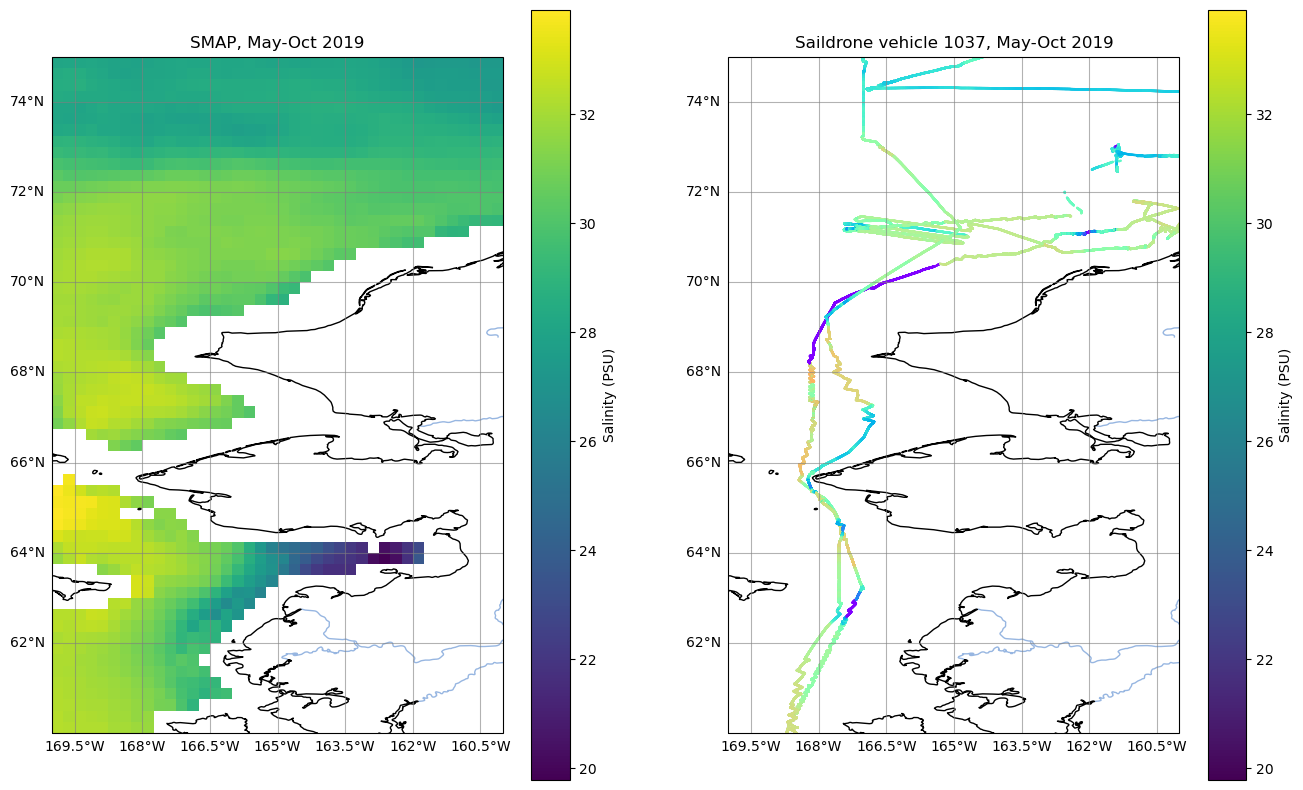

In [14]:
fig = plt.figure(figsize= (16,10))

rows = 1
columns = 2
ax = fig.add_subplot(rows, columns, 1, projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.RIVERS)
ax.coastlines()
ax.set_extent([plot_west, plot_east, plot_south, plot_north])
s = subset_mean_values.plot.pcolormesh(add_colorbar=False)
gl = ax.gridlines(color='gray',alpha=0.6,draw_labels=True) 
plt.title('SMAP, May-Oct 2019')
gl.top_labels = False
gl.left_labels = True
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
cb = plt.colorbar(s, ax = ax)
cb.set_label('Salinity (PSU)')

ax = fig.add_subplot(rows, columns, 2, projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.RIVERS)
ax.coastlines()
ax.set_extent([plot_west, plot_east, plot_south, plot_north])
s6 = plt.scatter(sd7.longitude, sd7.latitude, s = 0.5, c = sd7.SAL_SBE37_MEAN, vmin = 25, vmax = 35, cmap = 'rainbow', transform = ccrs.PlateCarree())
gl = ax.gridlines(color='gray',alpha=0.6,draw_labels=True)
plt.title('Saildrone vehicle 1037, May-Oct 2019')
gl.top_labels = False
gl.left_labels = True
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
cb = plt.colorbar(s, ax = ax)
cb.set_label('Salinity (PSU)')
plt.savefig('salinity_comparison_sd1037.png')